In [1]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
from __future__ import print_function
import os.path
import pandas
import src
import sklearn
import os

In [20]:
os.chdir('..')

In [21]:
projects = src.common.load_projects(dict(level='file'))
projects

[Project(name='tika', printable_name='tika v1.8', version='v1.8', ref='refs/tags/1.8', data_path='data/tika/', full_path='data/tika/v1.8/', src_path='data/tika/v1.8/src/', level='file'),
 Project(name='pig', printable_name='pig v0.14.0', version='v0.14.0', ref='refs/tags/release-0.14.0', data_path='data/pig/', full_path='data/pig/v0.14.0/', src_path='data/pig/v0.14.0/src/', level='file'),
 Project(name='bookkeeper', printable_name='bookkeeper v4.3.0', version='v4.3.0', ref='refs/tags/release-4.3.0', data_path='data/bookkeeper/', full_path='data/bookkeeper/v4.3.0/', src_path='data/bookkeeper/v4.3.0/src/', level='file'),
 Project(name='openjpa', printable_name='openjpa v2.3.0', version='v2.3.0', ref='refs/tags/2.3.0', data_path='data/openjpa/', full_path='data/openjpa/v2.3.0/', src_path='data/openjpa/v2.3.0/src/', level='file'),
 Project(name='mahout', printable_name='mahout v0.10.0', version='v0.10.0', ref='refs/tags/mahout-0.10', data_path='data/mahout/', full_path='data/mahout/v0.10.0

In [26]:
data = dict()
csvs = dict()
for project in projects:
    ownership = src.ownership.read_ownership(project)
    devs = set()
    for v in ownership.values():
        devs.update(v.keys())
        
    goldsets = pandas.read_csv(os.path.join(project.full_path, 'goldset-info.csv'))
    changes = pandas.read_csv(os.path.join(project.full_path, 'changeset-info.csv'))
    release = pandas.read_csv(os.path.join(project.full_path, 'releasefile-info.csv'))
    queries = pandas.read_csv(os.path.join(project.full_path, 'queries-info.csv'))
    info = {"Developers": len(devs), "Changesets": len(changes), "Files": len(release), "Issues": len(queries)}
    data[project.printable_name] = info
    
    csvs[project.name] = {'g': goldsets, 'c': changes, 'r': release, 'q': queries, 'd': devs, 'o': ownership}


In [27]:
df = pandas.DataFrame(data)

In [28]:
df['Total'] = df.T.sum()

In [29]:
df.T

,Changesets,Developers,Files,Issues
bookkeeper v4.3.0,574,5,843,164
mahout v0.10.0,3283,38,1556,133
openjpa v2.3.0,4616,26,4968,137
pig v0.14.0,2584,28,2098,222
tika v1.8,2469,26,954,40
zookeeper v3.5.0,1245,16,927,359
Total,14771,139,11346,1055


In [42]:
with open('paper/tables/subjects.tex', 'w') as f:
    latex = df.T.to_latex(columns=["Developers", "Files", "Changesets", "Issues"]).splitlines()
    latex.insert(-3, '\\midrule')
    f.write('\n'.join(latex))

In [43]:
for project in projects:
    print(project.name, 'q total ',  csvs[project.name]['q'].total_words.sum() / len(csvs[project.name]['q']))
    print(project.name, 'q unique', csvs[project.name]['q'].unique_words.sum() / len(csvs[project.name]['q']))
    print()
    print(project.name, 'c total ',  csvs[project.name]['c'].total_words.sum() / len(csvs[project.name]['c']))
    print(project.name, 'c unique', csvs[project.name]['c'].unique_words.sum() / len(csvs[project.name]['c']))
    print()
    print(project.name, 'r total ',  csvs[project.name]['r'].total_words.sum() / len(csvs[project.name]['r']))
    print(project.name, 'r unique', csvs[project.name]['r'].unique_words.sum() / len(csvs[project.name]['r']))
    print('********************')

bookkeeper q total  42
bookkeeper q unique 21

bookkeeper c total  4127
bookkeeper c unique 206

bookkeeper r total  663
bookkeeper r unique 122
********************
derby q total  142
derby q unique 39

derby c total  2777
derby c unique 134

derby r total  1055
derby r unique 154
********************
mahout q total  54
mahout q unique 28

mahout c total  2508
mahout c unique 141

mahout r total  614
mahout r unique 114
********************
openjpa q total  113
openjpa q unique 41

openjpa c total  1567
openjpa c unique 102

openjpa r total  402
openjpa r unique 96
********************
pig q total  79
pig q unique 28

pig c total  3785
pig c unique 159

pig r total  746
pig r unique 117
********************
tika q total  72
tika q unique 35

tika c total  900
tika c unique 130

tika r total  658
tika r unique 187
********************
zookeeper q total  79
zookeeper q unique 33

zookeeper c total  2258
zookeeper c unique 287

zookeeper r total  622
zookeeper r unique 139
**************

In [44]:
pigo = pandas.DataFrame(csvs['pig']['o'])
jpao = pandas.DataFrame(csvs['openjpa']['o'])
booko = pandas.DataFrame(csvs['bookkeeper']['o'])

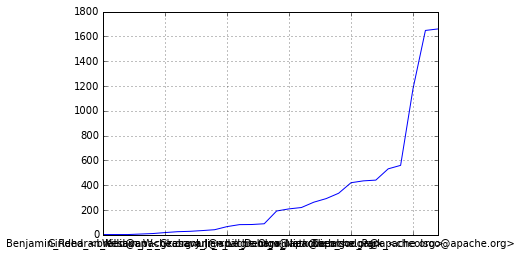

In [45]:
pigo.T.describe().T.sort("count")["count"].plot()

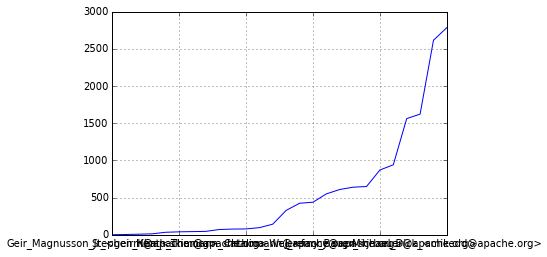

In [46]:
jpao.T.describe().T.sort("count")["count"].plot()

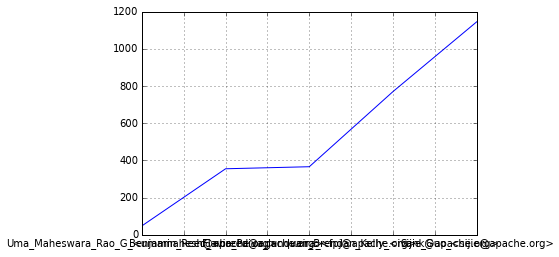

In [47]:
booko.T.describe().T.sort("count")["count"].plot()

In [48]:
def plot_ownership(data):
    m = dict()
    for each in data:
        z = data[each].argmax()
        if z not in m:
            m[z] = list()
        m[z].append(each)

    zz = pandas.Series([len(v) for v in m.values()], index=[k for k in m])
    zz.sort()
    zz.plot()
    return zz


Uma_Maheswara_Rao_G_<umamahesh@apache.org>    0.000552
Flavio_Paiva_Junqueira_<fpj@apache.org>       0.082320
Benjamin_Reed_<breed@apache.org>              0.093370
Ivan_Brendan_Kelly_<ivank@apache.org>         0.333149
Sijie_Guo_<sijie@apache.org>                  0.490608
dtype: float64

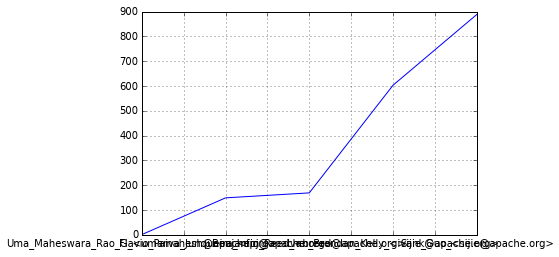

In [49]:
zz = plot_ownership(booko)
zz / zz.sum()

Jeff_Zhang_<zjffdu@apache.org>                      0.000293
Giridharan_Kesavan_<gkesavan@apache.org>            0.000586
Raghu_Angadi_<rangadi@apache.org>                   0.000586
Prashant_Kommireddi_<prkommireddi@apache.org>       0.000586
Koji_Noguchi_<knoguchi@apache.org>                  0.000879
Gianmarco_De_Francisci_Morales_<gdfm@apache.org>    0.000879
Xuefu_Zhang_<xuefu@apache.org>                      0.000879
Ashutosh_Chauhan_<hashutosh@apache.org>             0.001758
William_W._Graham_Jr_<billgraham@apache.org>        0.003223
Aniket_Namadeo_Mokashi_<aniket486@apache.org>       0.004981
Julien_Le_Dem_<julien@apache.org>                   0.005860
Jonathan_Coveney_<jcoveney@apache.org>              0.007618
Richard_Ding_<rding@apache.org>                     0.012892
Santhosh_Muthur_Srinivasan_<sms@apache.org>         0.016994
Pradeep_Kamath_<pradeepkth@apache.org>              0.019045
Yan_Zhou_<yanz@apache.org>                          0.024319
Dmitriy_V._Ryaboy_<dvrya

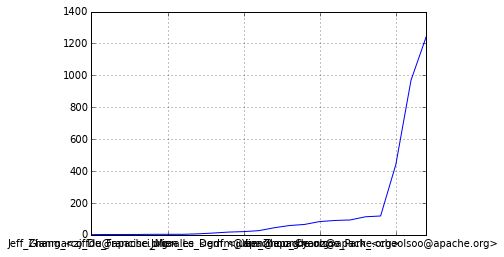

In [50]:
zz = plot_ownership(pigo)
zz / zz.sum()

Tim_McConnell_<mcconne@apache.org>          0.000160
Stephen_Kim_<skim@apache.org>               0.000160
Geir_Magnusson_Jr_<geirm@apache.org>        0.000160
Craig_Russell_<clr@apache.org>              0.001602
Jody_Grassel_<jgrassel@apache.org>          0.001762
Milosz_Tylenda_<mtylenda@apache.org>        0.002563
David_Ezzio_<dezzio@apache.org>             0.002723
Heath_Thomann_<hthomann@apache.org>         0.004486
David_J._Wisneski_<wisneskid@apache.org>    0.004646
Dianne_E._Richards_<dianner@apache.org>     0.006248
Kevin_W._Sutter_<kwsutter@apache.org>       0.008010
Mark_Struberg_<struberg@apache.org>         0.019225
Richard_G._Curtis_<curtisr7@apache.org>     0.021628
A._Abram_White_<awhite@apache.org>          0.026113
Albert_Lee_<allee8285@apache.org>           0.029157
Catalina_Wei_<fancy@apache.org>             0.036687
Fay_Wang_<faywang@apache.org>               0.048542
Marc_Prud'hommeaux_<mprudhom@apache.org>    0.069369
Jeremy_Bauer_<jrbauer@apache.org>           0.

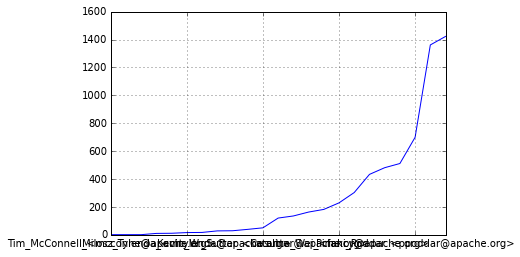

In [51]:
zz = plot_ownership(jpao)
zz / zz.sum()

In [52]:
datarank = dict()
for project in projects:
    rrank = src.main.read_ranks(project, 'release_lda')
    rgolds = src.main.create_goldsets(project)
    rrels = src.main.get_frms(rgolds, rrank)
    
    crank = src.main.read_ranks(project, 'changeset_lda')
    cgolds = src.main.create_goldsets(project)
    crels = src.main.get_frms(cgolds, crank)
    print(len(rrank), len(crank))
    
    x, y = src.main.merge_first_rels(crels, rrels, ignore=True)
    print(len(x), len(y))

    datarank[project.printable_name + ' ' + project.version] = {'Activity': pandas.Series(x), 'Location': pandas.Series(y)}

164 164
164 164
308 308
308 308
133 133
133 133
137 137
137 137
222 222
222 222
40 40
40 40
359 359
359 359


In [53]:
panel  = pandas.Panel(datarank)

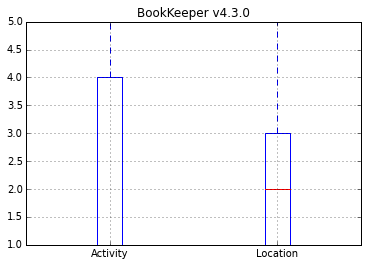

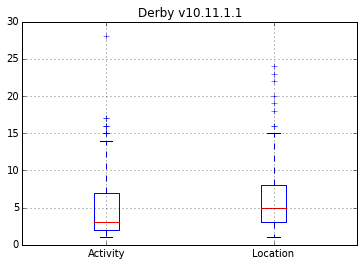

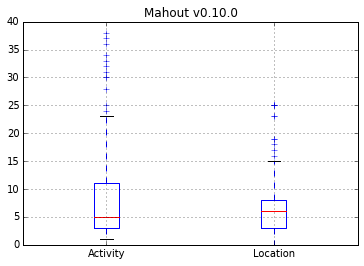

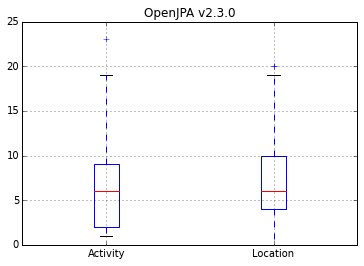

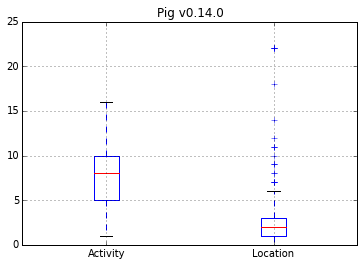

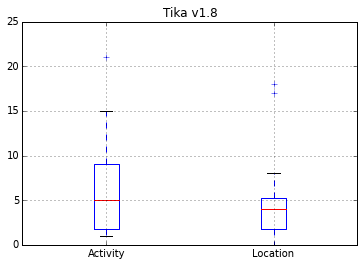

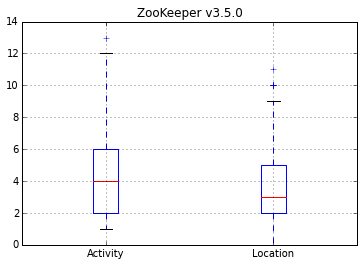

In [54]:
for each in panel:
    panel[each].plot(kind='box', title=each)

In [55]:
panel

<class 'pandas.core.panel.Panel'>
Dimensions: 7 (items) x 359 (major_axis) x 2 (minor_axis)
Items axis: BookKeeper v4.3.0 to ZooKeeper v3.5.0
Major_axis axis: 0 to 358
Minor_axis axis: Activity to Location

In [56]:
df2 = pandas.DataFrame(columns=["Activity", "Location"])
for each in panel:
    df2 = df2.append(panel[each], ignore_index=True)

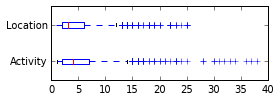

In [60]:
df2.plot(kind='box', figsize=(4,1.5), grid=False, vert=False)
plt.tight_layout()
plt.savefig('paper/figures/all_em.pdf', dpi=300)